## Time Series Analysis and Forecasting using Facebook Prophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\rasik\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
df=pd.read_csv(r"C:\Users\rasik\Downloads\Time Series\Project 2 - Facebook Prophet\Tesla.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
# Check for missing values
print(df.isnull().sum())
# Basic statistical details
df.describe()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


### Exploratory Data Analysis

The dataset is clean, containing no missing values, which simplifies preprocessing by eliminating the need for imputation.

📊 Dataset Overview:
- Total records: 1692

- The dataset includes key stock market indicators: Open, High, Low, Close, Adj Close, and Volume.

📌 Key Insights:
- The mean values for the price-related fields (Open, High, Low, Close, Adj Close) are approximately 132.

- The standard deviation is relatively high (~94), indicating considerable volatility in Tesla’s stock prices during the period.

- The minimum stock price recorded is around $15, while the maximum reaches $286, highlighting significant growth in Tesla’s market value.

- The Volume field (number of shares traded) ranges from a minimum of 118,500 to a peak of 37,163,900, reflecting fluctuations in market activity and investor interest.

Next, we will generate visualizations to better understand the temporal behavior of the stock:

- 📉 Closing Price Over Time: This will help identify trends, seasonality, or sudden shifts in price.

- 📊 Trading Volume Over Time: To understand periods of high investor engagement or notable market events.

These plots will offer valuable context before applying further modeling or forecasting techniques.

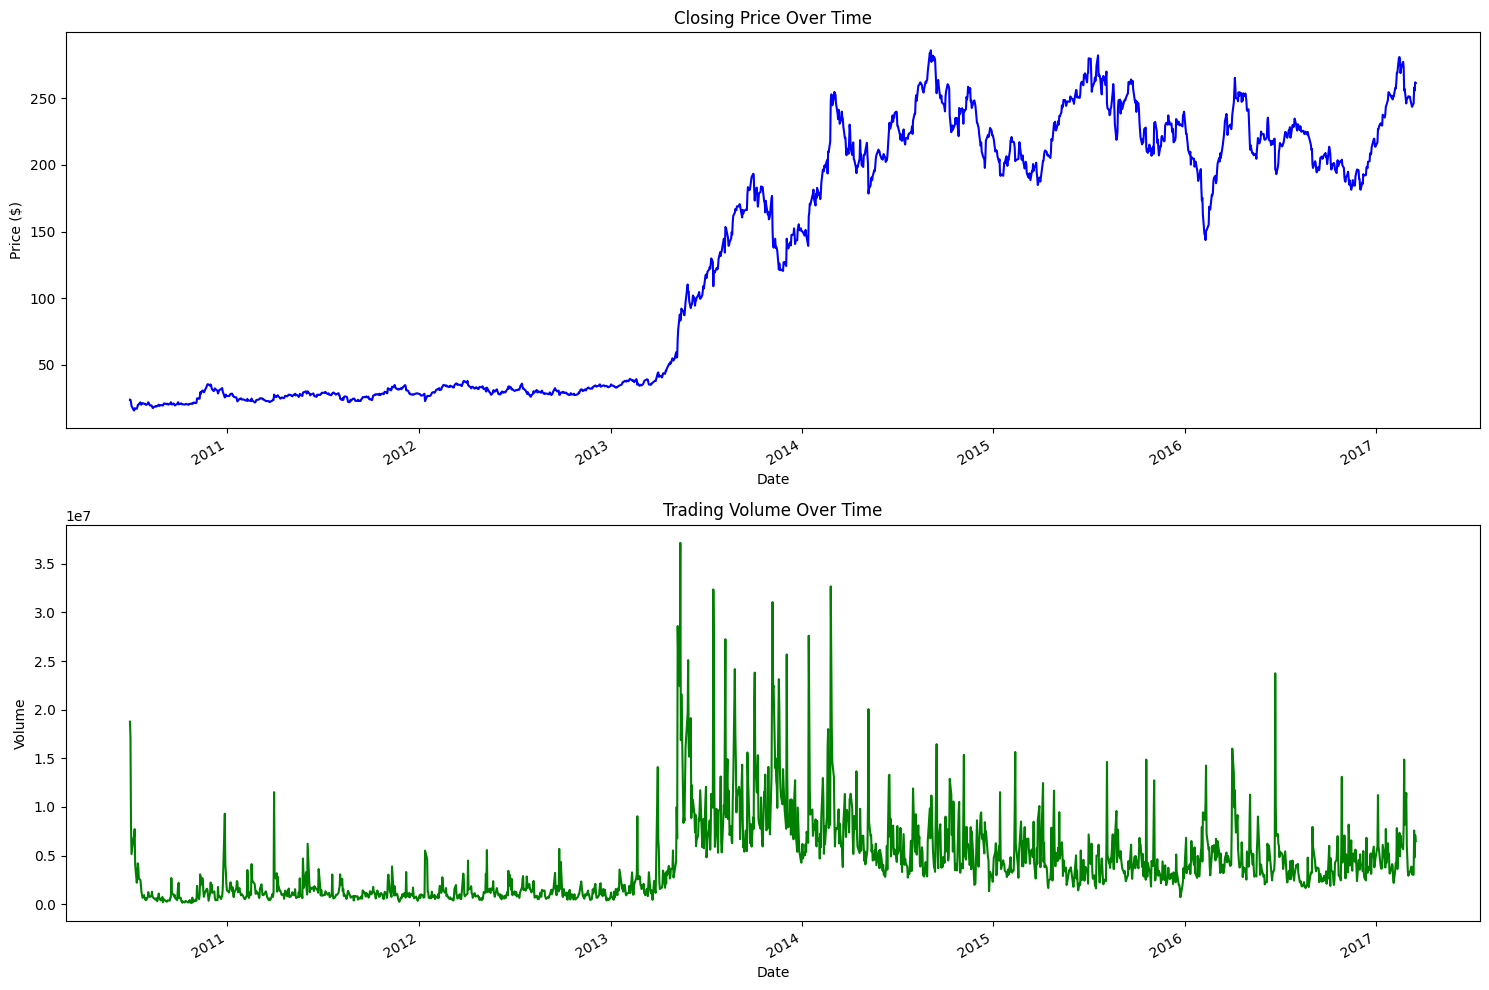

In [10]:
import matplotlib.pyplot as plt 

# Convert the 'Date' column to datetime format
df.Date = pd.to_datetime(df.Date)

# Set the date as the index of the dataframe
df.set_index('Date', inplace=True)

# Create a figure and a set of subplots
fig, ax=plt.subplots(nrows=2, ncols=1, figsize=(15,10))

# Plot the closing time over time 
df.Close.plot(ax=ax[0], color='blue')
ax[0].set_title('Closing Price Over Time')
ax[0].set_ylabel('Price ($)')

# Plot the trading volumne over time 
df.Volume.plot(ax=ax[1], color='green')
ax[1].set_title('Trading Volume Over Time')
ax[1].set_ylabel('Volume')

# Improve layout
plt.tight_layout()
plt.show()

The above plots provide a clear visual representation of how Tesla’s closing price and trading volume have evolved over time.

🔹 Closing Price Over Time
The closing price of Tesla's stock has shown a general upward trend, reflecting overall growth. Periods of sharp increases and occasional pullbacks are evident, which is characteristic of financial time series data that often exhibits volatility.

🔹 Trading Volume Over Time
The trading volume plot reveals fluctuations in investor activity. Spikes in trading volume may correspond to key events, announcements, or broader market movements. These surges can provide context for significant price changes.



### Forecasting with Facebook Prophet

Having completed a preliminary analysis, we now move forward with time series forecasting using the Facebook Prophet library.
Prophet is well-suited for this task as it effectively captures:

- Trend changes over time

- Seasonality, such as weekly or yearly patterns

- The impact of holidays or special events

This makes Prophet a powerful and flexible tool for modeling financial time series like stock prices, 
where external factors often influence trends.

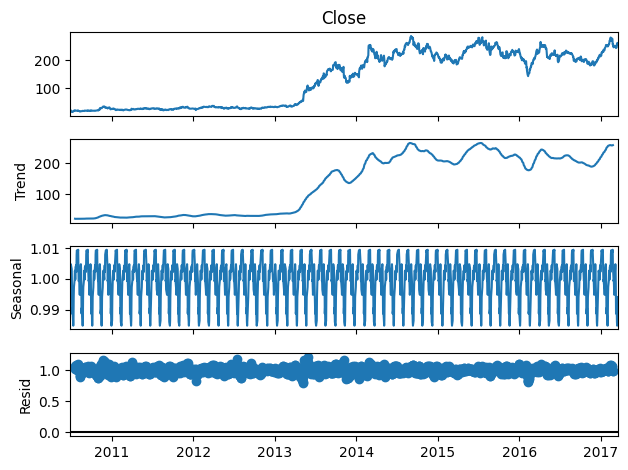

In [11]:
# Seasonality Analysis
decomposition = seasonal_decompose(df.Close, model='multiplicative', period=30)
fig=decomposition.plot()
plt.show()

### 📊 Seasonal Decomposition of Tesla’s Stock Price

A seasonal decomposition analysis of Tesla’s closing stock prices yields valuable insights into the underlying patterns within the time series data:

🔹 Trend
The trend component highlights a consistent long-term upward movement in Tesla’s stock price, punctuated by short-term declines. This reflects the company's overall growth trajectory over the observed period.

🔹 Seasonality
The seasonal component exhibits subtle, recurring fluctuations, potentially on a monthly basis, suggesting that certain price behaviors may repeat regularly throughout the year.

🔹 Residuals
The residuals, representing the portion of the price not explained by trend or seasonality, show increased dispersion over time. This points to growing volatility or unpredictability, indicating that the stock has become more reactive to external market factors or investor sentiment in recent periods.

### 📈 Volatility Analysis

To better understand the risk profile of Tesla’s stock, we now conduct a volatility analysis. This involves examining the returns (i.e., percentage change in price) and how much they fluctuate over time.

- High volatility indicates that the stock experiences large and frequent price swings, representing higher investment risk but also higher potential returns.

- Low volatility suggests more stable price movements, which are generally less risky but may also offer lower returns.

This analysis provides critical insights for investors and analysts, as volatility is a key factor in both risk management and portfolio decision-making.

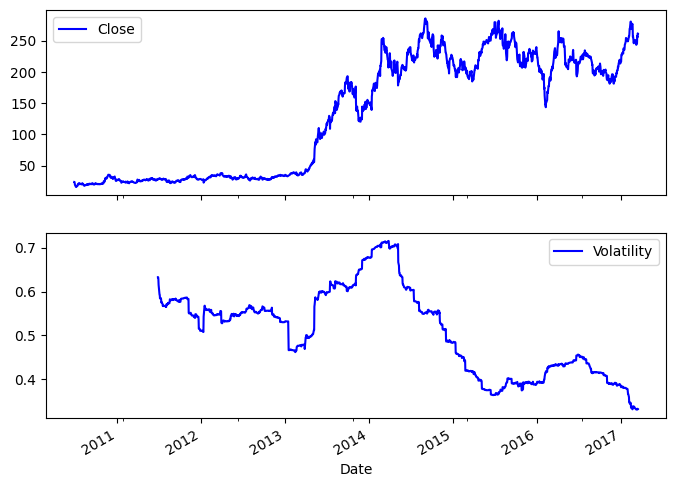

In [16]:
# Volatility Analysis 
df['Return'] = df.Close.pct_change()
df['Volatility']= df['Return'].rolling(window=252).std()*np.sqrt(252)
df[['Close','Volatility']].plot(subplots=True, color='blue',figsize=(8,6))
plt.show()

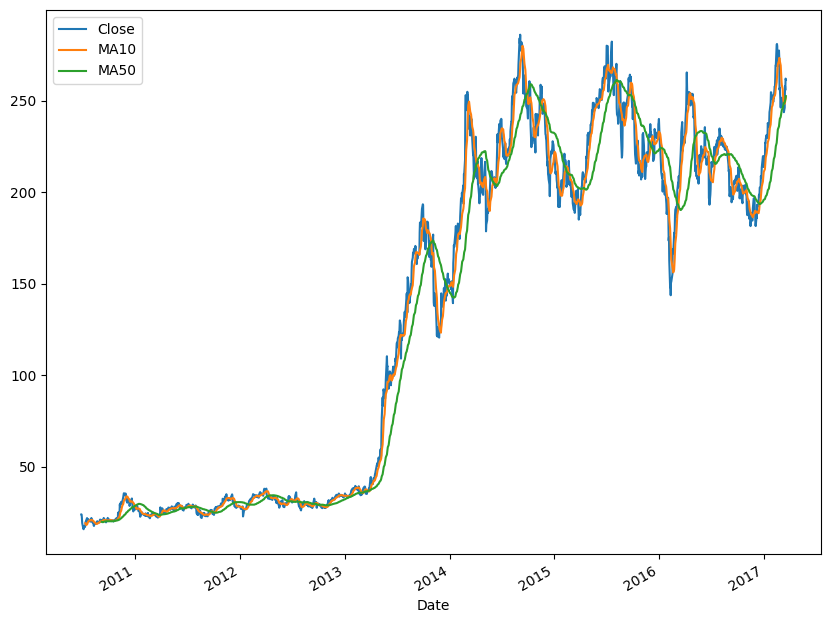

In [17]:
# Moving Average Analysis
df['MA10']=df['Close'].rolling(window=10).mean()
df['MA50']=df['Close'].rolling(window=50).mean()
df[['Close','MA10','MA50']].plot(label='Tesla', figsize=(10,8))
plt.show()


### 📈 **Moving Average Analysis of Tesla Stock**

The analysis of Tesla’s stock using moving averages provides key insights into its short- and long-term price trends:

* **Closing Prices**: Over the observed time period, Tesla’s closing stock prices exhibit a general **upward trajectory**, despite experiencing intermittent phases of decline. This indicates a long-term growth trend in the stock’s performance.

* **10-Day Moving Average (MA10)**: The 10-day moving average highlights the **short-term trend** of the stock. When the closing price rises above the MA10, it may suggest short-term bullish momentum. Conversely, a closing price below MA10 may imply short-term bearish sentiment.

* **50-Day Moving Average (MA50)**: The 50-day moving average serves as an indicator of the **long-term trend**. A closing price above the MA50 typically reflects a sustained upward movement in the stock over a longer horizon, whereas a price below the MA50 may suggest a long-term downward trend.

* **Moving Average Crossover Strategy**: A commonly employed trading strategy involves monitoring the crossover of moving averages:

  * A **bullish crossover** occurs when the MA10 crosses **above** the MA50, often interpreted as a **buy signal**, indicating increasing short-term momentum relative to the long-term trend.
  * A **bearish crossover** occurs when the MA10 crosses **below** the MA50, often interpreted as a **sell signal**, suggesting weakening momentum.

This crossover analysis helps traders identify potential entry and exit points based on the convergence and divergence of price trends over different time horizons.

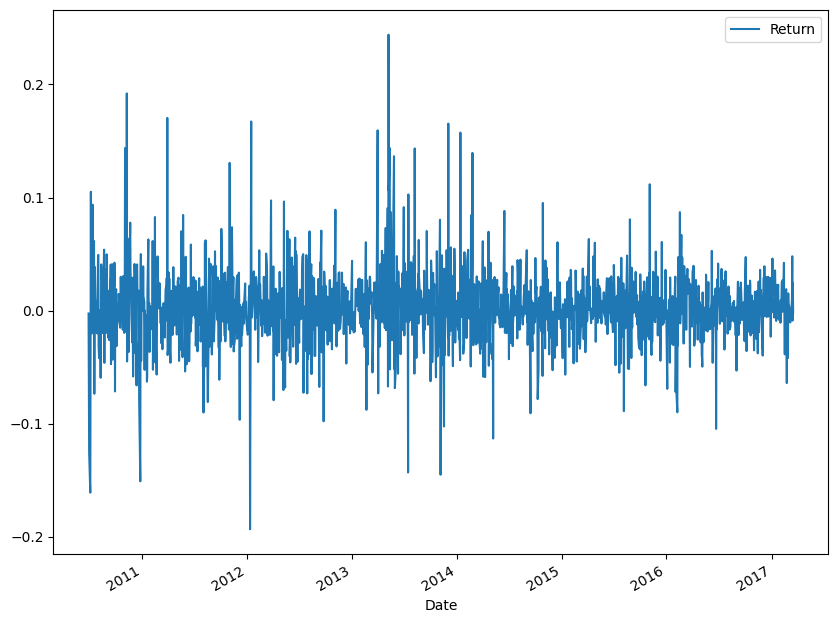

In [18]:
# Return Analysis
df['Return'] = df.Close.pct_change()
df[['Return']].plot(label='Return', figsize=(10,8))
plt.show()

### 📊 **Return Analysis of Tesla Stock**

The daily return chart quantifies the **percentage change in Tesla’s closing price from one trading session to the next**, offering insight into both performance and risk. Key takeaways include:

* **Direction of Returns**

  * Returns oscillate around zero, with a mixture of positive and negative values—evidence of alternating days of gains and losses.

* **Volatility**

  * The **magnitude** of these fluctuations serves as a proxy for volatility.
  * **Larger swings** (both upward and downward) signal higher volatility, whereas **smaller movements** denote more stable periods.
  * Distinct clusters of heightened volatility appear in the chart, underscoring periods when price movements were especially pronounced.

* **Extreme Spikes**

  * Occasional *outlier* bars correspond to trading sessions with **exceptionally large price shifts**.
  * Such spikes are typically linked to catalysts like earnings releases, macro‑market shocks, or company‑specific news.

* **Interpretation**

  * A **positive return** indicates the stock closed higher than the preceding day; a **negative return** indicates a decline.
  * Monitoring the dispersion and frequency of these returns helps evaluate Tesla’s risk–reward profile over time.

---

### 🛠 **Preparing Data for Prophet Forecasting**

Prophet requires a standardized input structure:

| Column   | Purpose                                | Example                        |
| -------- | -------------------------------------- | ------------------------------ |
| **`ds`** | Datestamp (must be in datetime format) | `2025‑07‑15`                   |
| **`y`**  | Target variable to forecast            | `265.34` (Tesla closing price) |

**Steps to format the dataset:**

1. **Select Relevant Columns**

   ```python
   df_prophet = df[['Date', 'Close']].copy()
   ```

2. **Rename Columns to `ds` and `y`**

   ```python
   df_prophet.columns = ['ds', 'y']
   ```

3. **Ensure Datetime Type**

   ```python
   df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])
   ```

The resulting dataframe, `df_prophet`, is now ready for model fitting:

```python
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
```

This setup enables Prophet to generate forecasts for Tesla’s closing price, incorporating its inherent trend and seasonality while bypassing manual stationarity adjustments.


In [20]:
# Prepare the data for Prophet
prophet_df=df.reset_index()[['Date','Close']]
prophet_df.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)
prophet_df.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


13:33:25 - cmdstanpy - INFO - Chain [1] start processing
13:33:25 - cmdstanpy - INFO - Chain [1] done processing


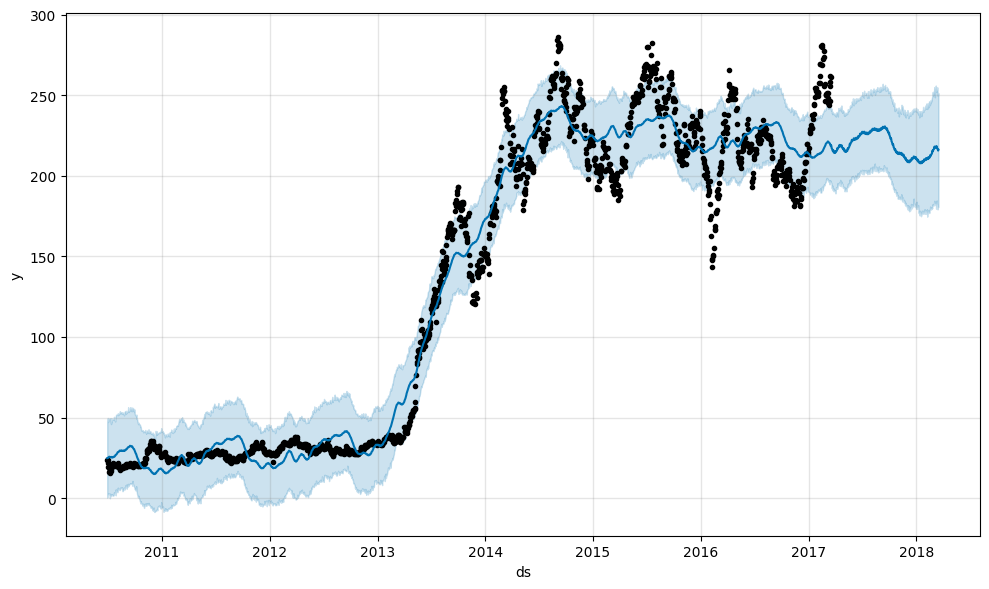

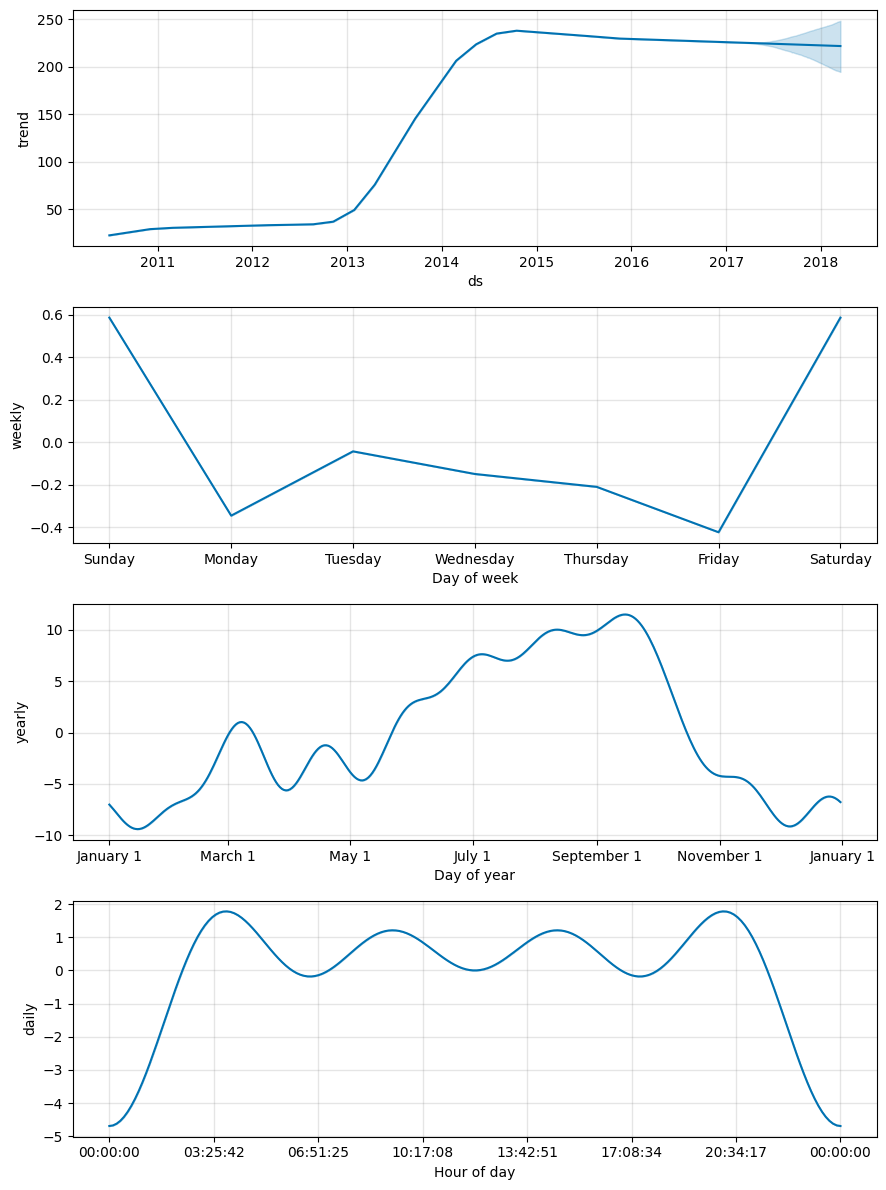

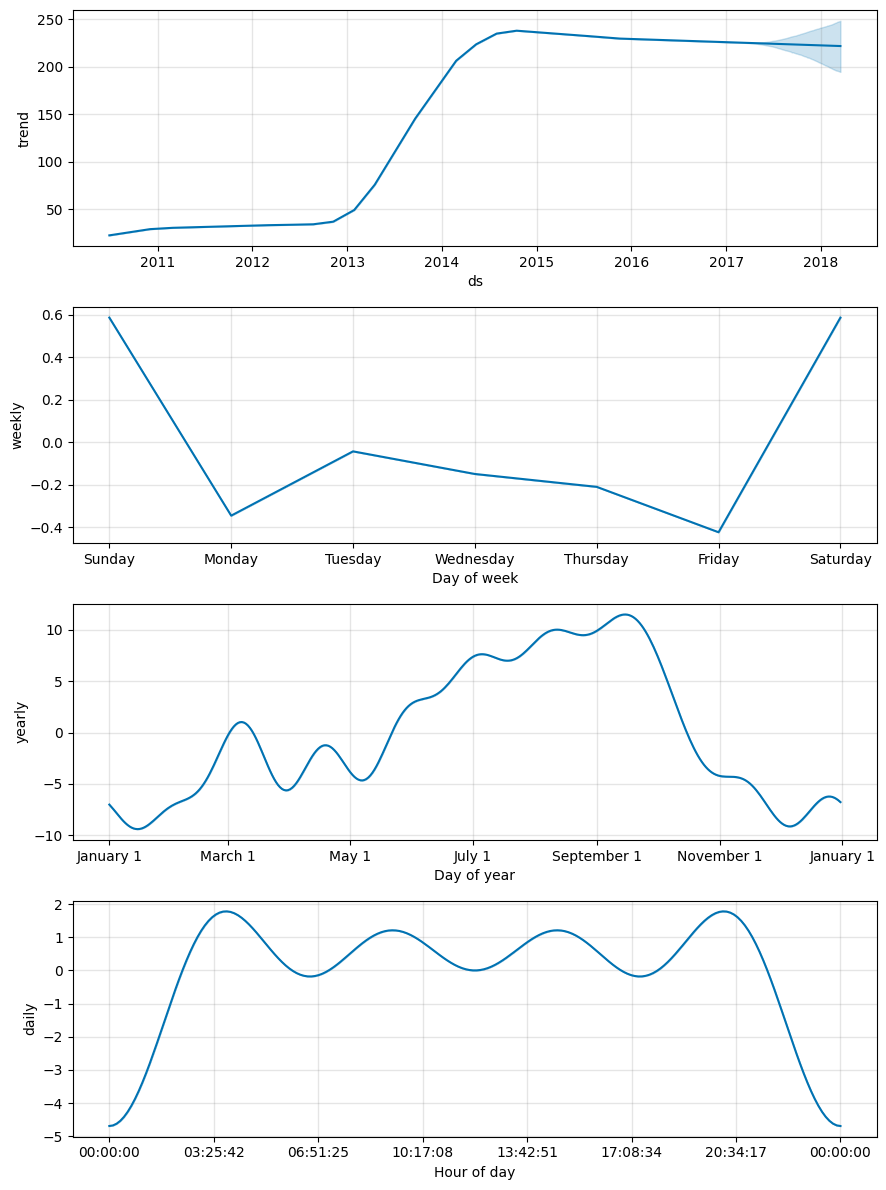

In [22]:
# Initialize the Prophet Model
model=Prophet(daily_seasonality=True)

# Fit the model to the data
model.fit(prophet_df)

# Specify the number of days for predictions
future=model.make_future_dataframe(periods=365)

# Use the model to make predictions
forecast=model.predict(future)

# Visualize the forecast
model.plot(forecast)
plt.show()

# If you want to see the components of the forecast, you can see
model.plot_components(forecast)